Importing Libraries and Data

In [1]:
#Libraries required to run the code

import pandas as pd #Data Analysis
import numpy as np #Working with arrays

import matplotlib.pyplot as plt #Creating and plotting figures & diagrams
import seaborn as sns #Data Visualisation

#Pre-processing data
from sklearn.preprocessing import OneHotEncoder, StandardScaler #Used for Preprocessing

#Prediction scores
from sklearn import model_selection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #Used for Training & Testing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn_evaluation import plot #Evaluation with Graphs

In [2]:
#Dataset added to code in order to run Data Analytics based in Computer Science
#https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

df = pd.read_csv('US_Accidents_March23.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape #The total number of rows and columns seperately (rows, columns)

(7728394, 46)

Data Cleaning

In [4]:
#https://sparkbyexamples.com/pandas/pandas-convert-string-column-to-datetime/#:~:text=Use%20pandas%20to_datetime()%20function,string%20you%20wanted%20to%20convert.
#Using accidents recorded from 2023 onwards

df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df = df[df['Start_Time'] > '2023-01-01 00:00:00']

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246629 entries, 3640578 to 5423491
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     246629 non-null  object        
 1   Source                 246629 non-null  object        
 2   Severity               246629 non-null  int64         
 3   Start_Time             246629 non-null  datetime64[ns]
 4   End_Time               246629 non-null  datetime64[ns]
 5   Start_Lat              246629 non-null  float64       
 6   Start_Lng              246629 non-null  float64       
 7   End_Lat                246629 non-null  float64       
 8   End_Lng                246629 non-null  float64       
 9   Distance(mi)           246629 non-null  float64       
 10  Description            246629 non-null  object        
 11  Street                 245859 non-null  object        
 12  City                   246627 non-nul

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3640578,A-3650461,Source1,2,2023-03-31 17:09:16,2023-03-31 18:09:49,45.676472,-94.174568,45.666976,-94.176184,0.661,...,False,False,False,False,False,False,Day,Day,Day,Day
3640579,A-3650462,Source1,2,2023-02-27 20:55:00,2023-02-27 23:36:34,41.391812,-75.467365,41.398370,-75.484203,0.983,...,False,False,False,False,False,False,Night,Night,Night,Night
3640580,A-3650463,Source1,2,2023-02-26 09:31:45,2023-02-26 11:58:19,40.850278,-73.946140,40.846945,-73.933651,0.692,...,False,False,False,False,False,False,Day,Day,Day,Day
3640581,A-3650464,Source1,2,2023-03-21 17:46:42,2023-03-21 18:31:50,33.714992,-84.300188,33.714532,-84.266758,1.922,...,False,False,False,False,False,False,Day,Day,Day,Day
3640582,A-3650465,Source1,2,2023-03-24 04:46:30,2023-03-24 09:22:00,33.927671,-118.266385,33.929608,-118.343065,4.398,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
df.duplicated().sum()

0

In [7]:
#Dropping columns and rows with unique and missing values respectively

df.drop('ID', axis=1, inplace=True)
df.drop('Start_Time', axis=1, inplace=True)
df.drop('End_Time', axis=1, inplace=True)
df.drop('Start_Lat', axis=1, inplace=True)
df.drop('Start_Lng', axis=1, inplace=True)
df.drop('End_Lat', axis=1, inplace=True)
df.drop('End_Lng', axis=1, inplace=True)
df.drop('Description', axis=1, inplace=True)
df.drop('Source', axis=1, inplace=True)
df.drop('Street', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)
df.drop('County', axis=1, inplace=True)
df.drop('Zipcode', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.drop('Timezone', axis=1, inplace=True)
df.drop('Airport_Code', axis=1, inplace=True)
df.drop('Weather_Timestamp', axis=1, inplace=True)
df.dropna(axis = 0, how = 'any')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
#Analysing the columns, rows and their statictics

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229794 entries, 0 to 229793
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               229794 non-null  int64  
 1   Distance(mi)           229794 non-null  float64
 2   State                  229794 non-null  object 
 3   Temperature(F)         229794 non-null  float64
 4   Wind_Chill(F)          229794 non-null  float64
 5   Humidity(%)            229794 non-null  float64
 6   Pressure(in)           229794 non-null  float64
 7   Visibility(mi)         229794 non-null  float64
 8   Wind_Direction         229794 non-null  object 
 9   Wind_Speed(mph)        229794 non-null  float64
 10  Precipitation(in)      229794 non-null  float64
 11  Weather_Condition      229794 non-null  object 
 12  Amenity                229794 non-null  bool   
 13  Bump                   229794 non-null  bool   
 14  Crossing               229794 non-nu

,Severity,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,0.661,MN,33.0,22.0,89.0,28.33,3.0,NE,17.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1,2,0.983,PA,32.0,25.0,82.0,28.64,1.0,SE,8.0,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,0.692,NY,31.0,22.0,79.0,29.86,6.0,WSW,10.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3,2,1.922,GA,61.0,61.0,22.0,29.19,10.0,SSE,10.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,4.398,CA,57.0,57.0,39.0,30.13,10.0,NW,9.0,...,False,False,False,False,False,False,Night,Night,Night,Night


In [9]:
df.isnull().sum()

Severity                 0
Distance(mi)             0
State                    0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

Descriptive Analytics (Exploratory Data Analysis)

In [10]:
#https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

df.describe() #Calculates the below data for each column

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,229794.000000,229794.000000,229794.000000,229794.000000,229794.000000,229794.000000,229794.000000,229794.000000,229794.000000
mean,2.055615,0.901634,47.957218,45.277379,68.535928,29.214918,8.453849,7.926103,0.007288
std,0.328843,2.108236,15.225545,18.200078,22.501034,1.315811,3.016797,5.813701,0.035433
min,2.000000,0.000000,-27.000000,-41.000000,1.000000,20.020000,0.000000,0.000000,0.000000
25%,2.000000,0.070000,37.000000,33.000000,52.000000,29.030000,9.000000,3.000000,0.000000
50%,2.000000,0.287000,49.000000,47.000000,72.000000,29.590000,10.000000,7.000000,0.000000
75%,2.000000,0.927000,58.000000,58.000000,88.000000,29.960000,10.000000,12.000000,0.000000
max,4.000000,59.368000,90.000000,90.000000,100.000000,30.720000,70.000000,127.000000,2.050000


In [11]:
df.corr() #Correlation

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,-0.025182,-0.034081,-0.033509,0.010894,-0.052231,0.004000,-0.006669,-0.010030,-0.005291,...,0.006835,-0.000511,0.000026,0.005953,-0.001058,-0.011619,0.010942,-0.005247,-0.002759,NaN
Distance(mi),-0.025182,1.000000,-0.068090,-0.075286,0.010666,-0.137138,-0.084950,0.024211,0.015102,-0.030884,...,-0.014293,0.023741,-0.009266,-0.016581,-0.002445,-0.042266,-0.043284,-0.008148,-0.101363,NaN
Temperature(F),-0.034081,-0.068090,1.000000,0.986989,-0.348675,0.420609,0.275721,0.019546,-0.001392,0.019698,...,-0.007007,-0.013451,0.004698,0.006536,0.007416,0.060645,0.014798,0.013218,0.084636,NaN
Wind_Chill(F),-0.033509,-0.075286,0.986989,1.000000,-0.334420,0.428673,0.284451,-0.086129,-0.004198,0.020627,...,-0.007565,-0.014827,0.005006,0.006692,0.006706,0.057916,0.017502,0.013466,0.081561,NaN
Humidity(%),0.010894,0.010666,-0.348675,-0.334420,1.000000,-0.100705,-0.510653,-0.110071,0.208966,-0.015806,...,0.004012,-0.001852,-0.006070,-0.001635,-0.000613,-0.023759,-0.009684,-0.004745,-0.043354,NaN
Pressure(in),-0.052231,-0.137138,0.420609,0.428673,-0.100705,1.000000,0.193578,-0.090598,-0.022005,0.027135,...,0.002858,0.029718,0.005553,0.020048,0.003169,0.047083,0.009143,0.008417,0.068698,NaN
Visibility(mi),0.004000,-0.084950,0.275721,0.284451,-0.510653,0.193578,1.000000,-0.035429,-0.308838,0.018549,...,0.002533,-0.005287,0.009474,0.005327,0.003208,0.036658,0.020781,0.008421,0.058422,NaN
Wind_Speed(mph),-0.006669,0.024211,0.019546,-0.086129,-0.110071,-0.090598,-0.035429,1.000000,0.059522,-0.005067,...,0.004353,0.008967,-0.000714,0.000760,0.001276,0.000605,-0.011460,-0.002093,0.000676,NaN
Precipitation(in),-0.010030,0.015102,-0.001392,-0.004198,0.208966,-0.022005,-0.308838,0.059522,1.000000,-0.009823,...,-0.004210,0.010453,-0.005097,-0.002588,-0.001287,-0.012883,-0.010510,-0.001587,-0.026622,NaN
Amenity,-0.005291,-0.030884,0.019698,0.020627,-0.015806,0.027135,0.018549,-0.005067,-0.009823,1.000000,...,0.008128,-0.020110,0.011999,0.040184,-0.000592,0.130758,0.031258,0.021004,0.091534,NaN


<Axes: >

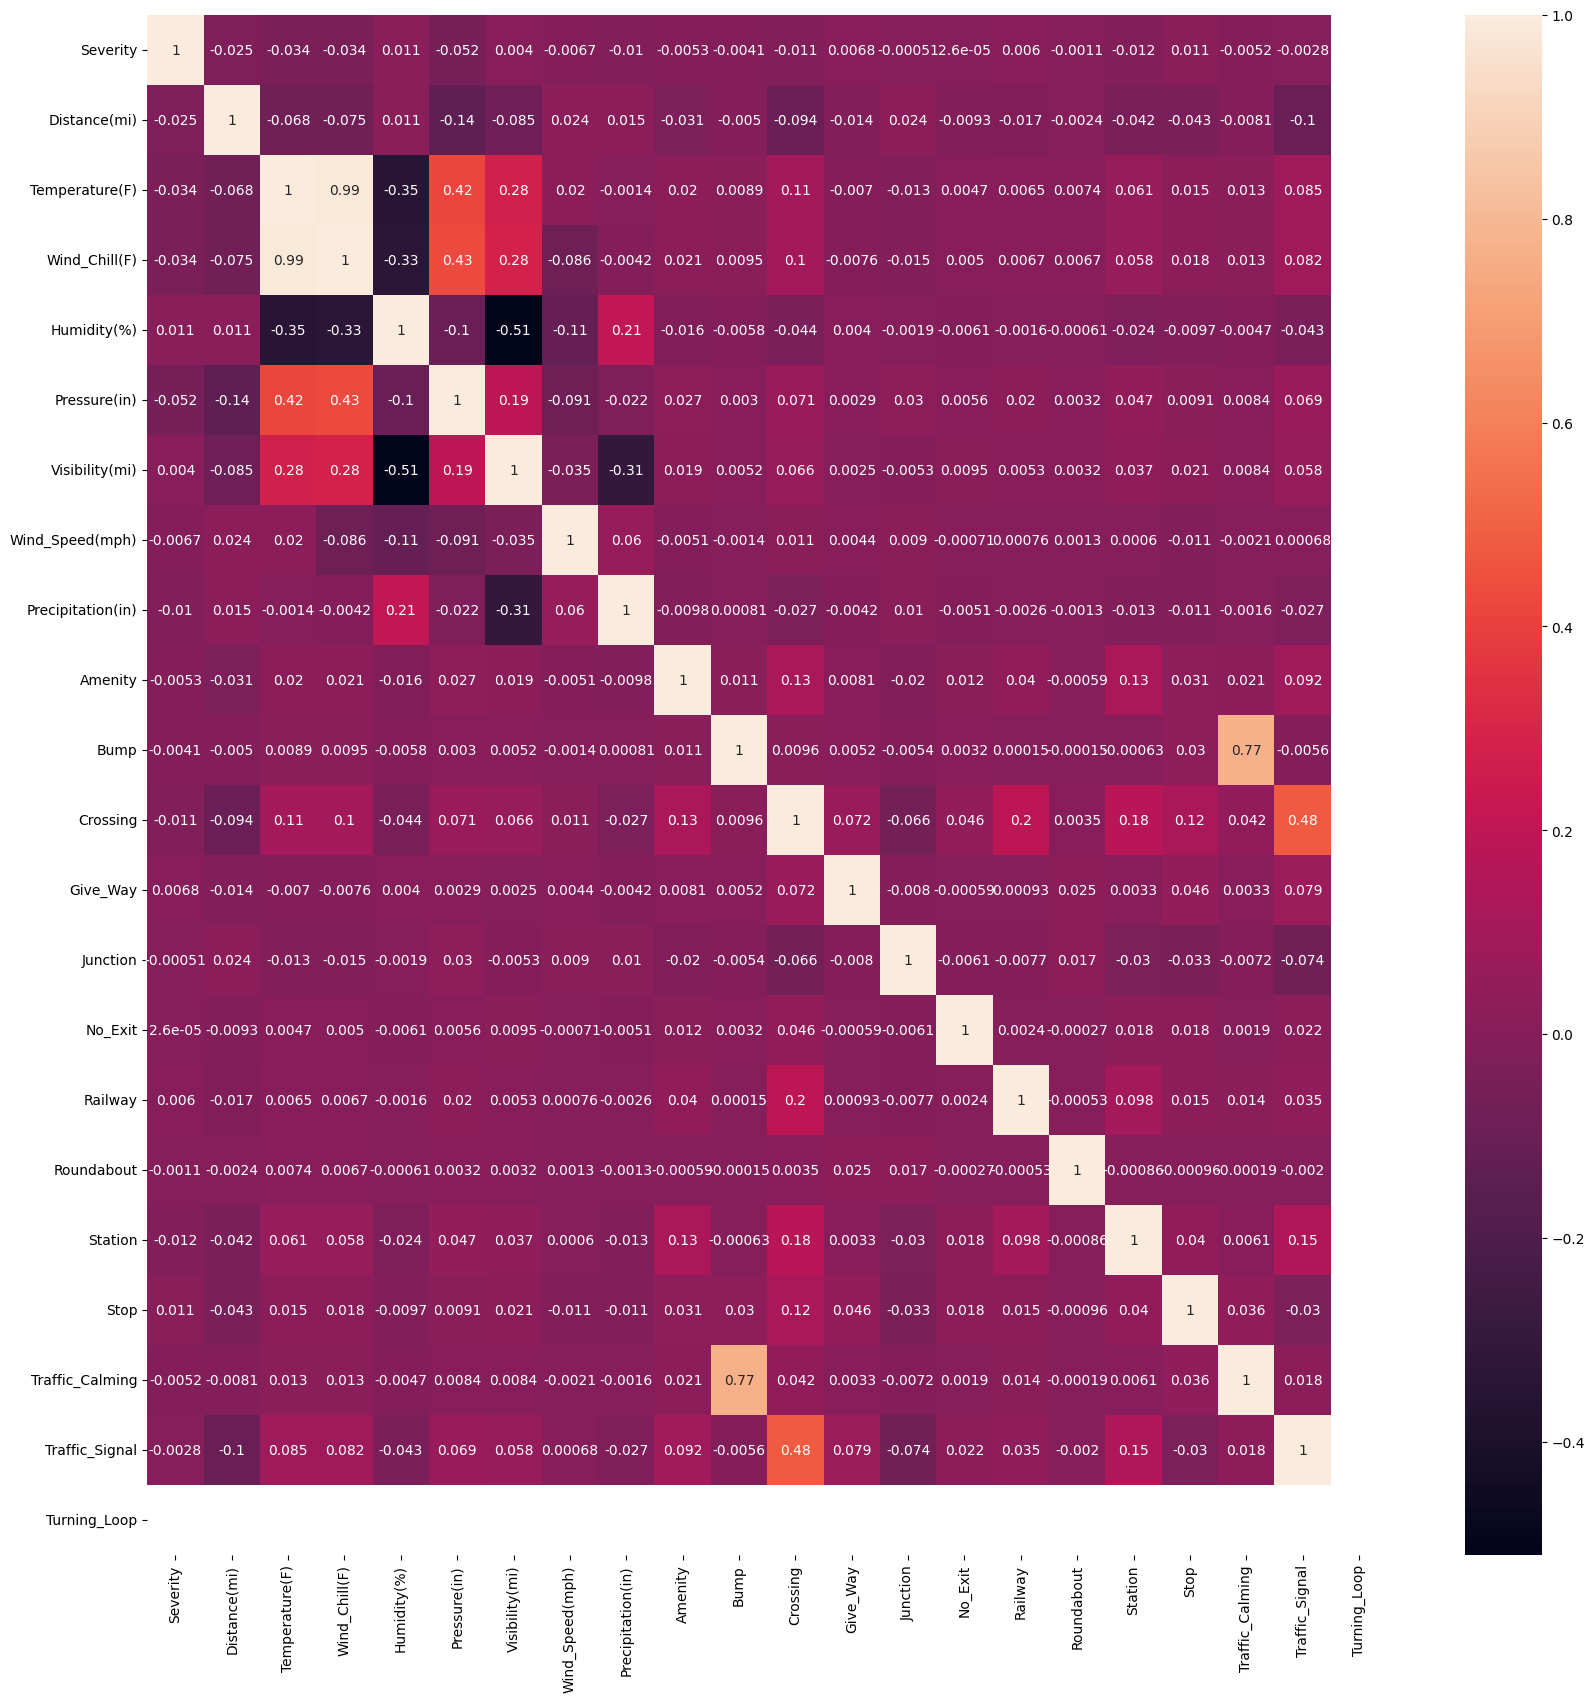

In [ ]:
#https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

plt.figure(figsize = (20, 20))
sns.heatmap(data=df.corr(), annot=True) #Heatmap

In [13]:
df.duplicated().sum()

18095

In [14]:
df.value_counts('Severity') #Statistics of the required output

Severity
2    223404
4      6390
dtype: int64

In [15]:
df.value_counts('Weather_Condition') #Statistics of the required output

Weather_Condition
Fair                         92801
Cloudy                       45744
Mostly Cloudy                24934
Light Rain                   15785
Partly Cloudy                12912
                             ...  
Snow and Thunder                 1
Heavy Snow with Thunder          1
Heavy Sleet and Thunder          1
Heavy Sleet / Windy              1
Light Rain Shower / Windy        1
Length: 76, dtype: int64

In [16]:
df.groupby(['Amenity', 'Junction']).size() #Statistics of the required output

Amenity  Junction
False    False       210707
         True         17046
True     False         2003
         True            38
dtype: int64

In [17]:
df.groupby(['Amenity', 'Bump']).size() #Statistics of the required output

Amenity  Bump 
False    False    227628
         True        125
True     False      2034
         True          7
dtype: int64

In [18]:
df.value_counts('Junction') #Statistics of the required output

Junction
False    212710
True      17084
dtype: int64

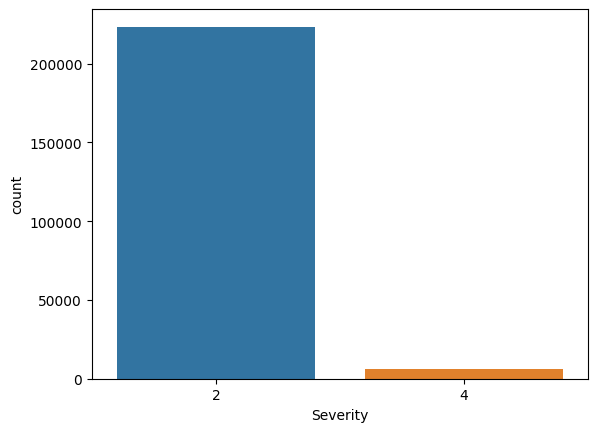

In [19]:
sns.countplot(x = 'Severity', data = df) #Countplot for the targeted output
plt.show()

c:\Python392\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


[]

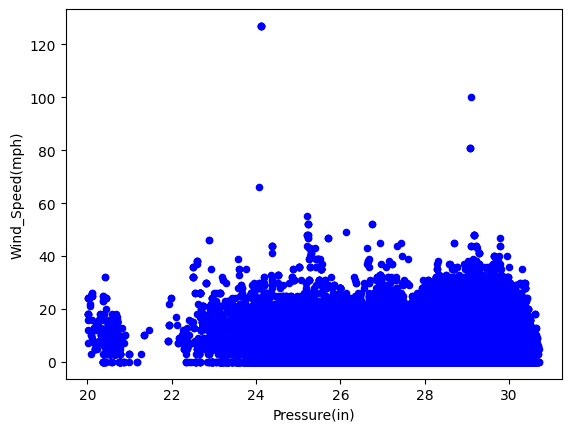

In [20]:
s = df.plot.scatter(x='Pressure(in)', y='Wind_Speed(mph)', c='Blue') #Scatterplot
s.plot(figsize = (50, 50))

<Axes: xlabel='Severity', ylabel='Distance(mi)'>

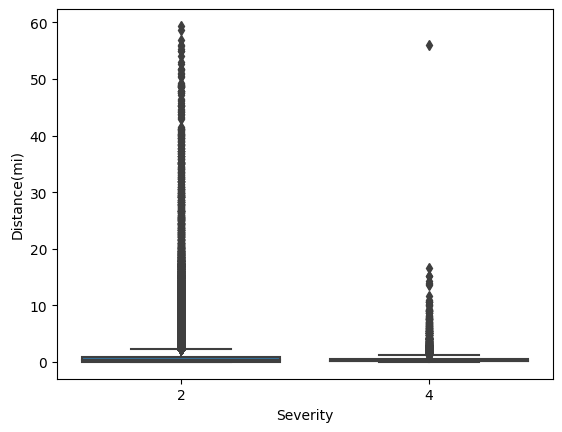

In [21]:
sns.boxplot(x = 'Severity', y = 'Distance(mi)', data = df) #Boxplot

array([[<Axes: title={'center': 'Severity'}>,
        <Axes: title={'center': 'Distance(mi)'}>,
        <Axes: title={'center': 'Temperature(F)'}>],
       [<Axes: title={'center': 'Wind_Chill(F)'}>,
        <Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Pressure(in)'}>],
       [<Axes: title={'center': 'Visibility(mi)'}>,
        <Axes: title={'center': 'Wind_Speed(mph)'}>,
        <Axes: title={'center': 'Precipitation(in)'}>]], dtype=object)

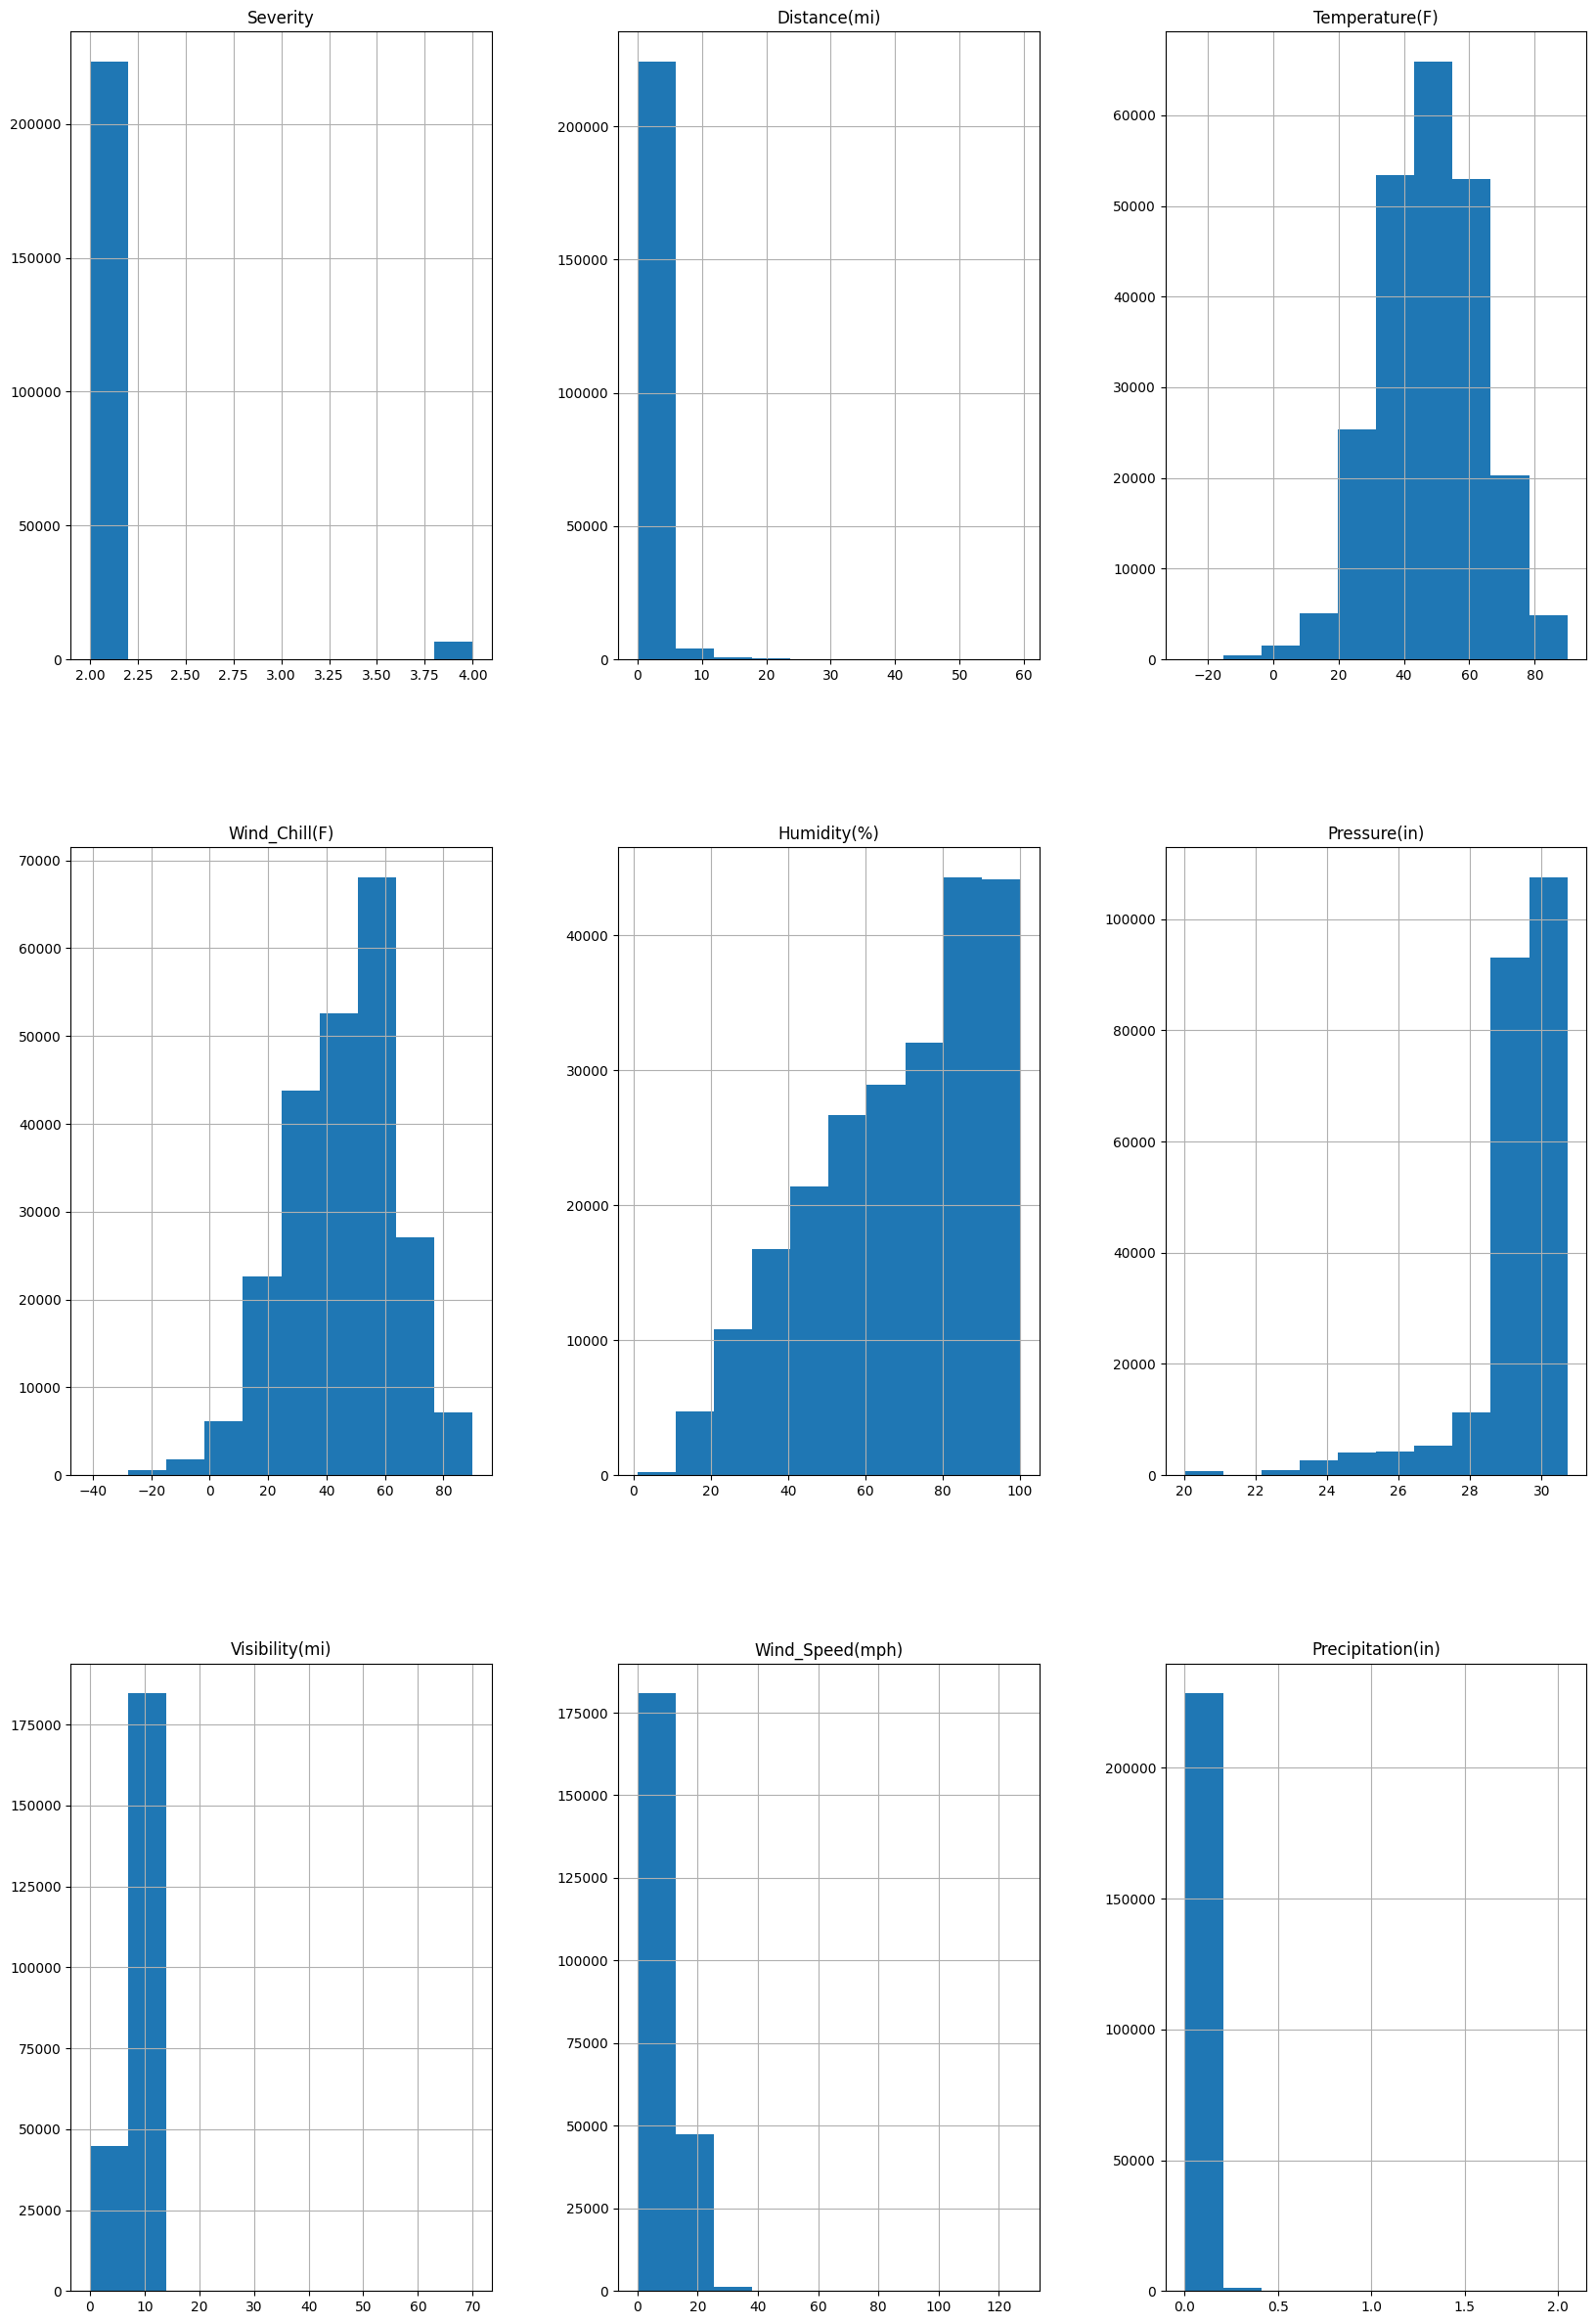

In [22]:
df.hist(figsize=(20, 30))

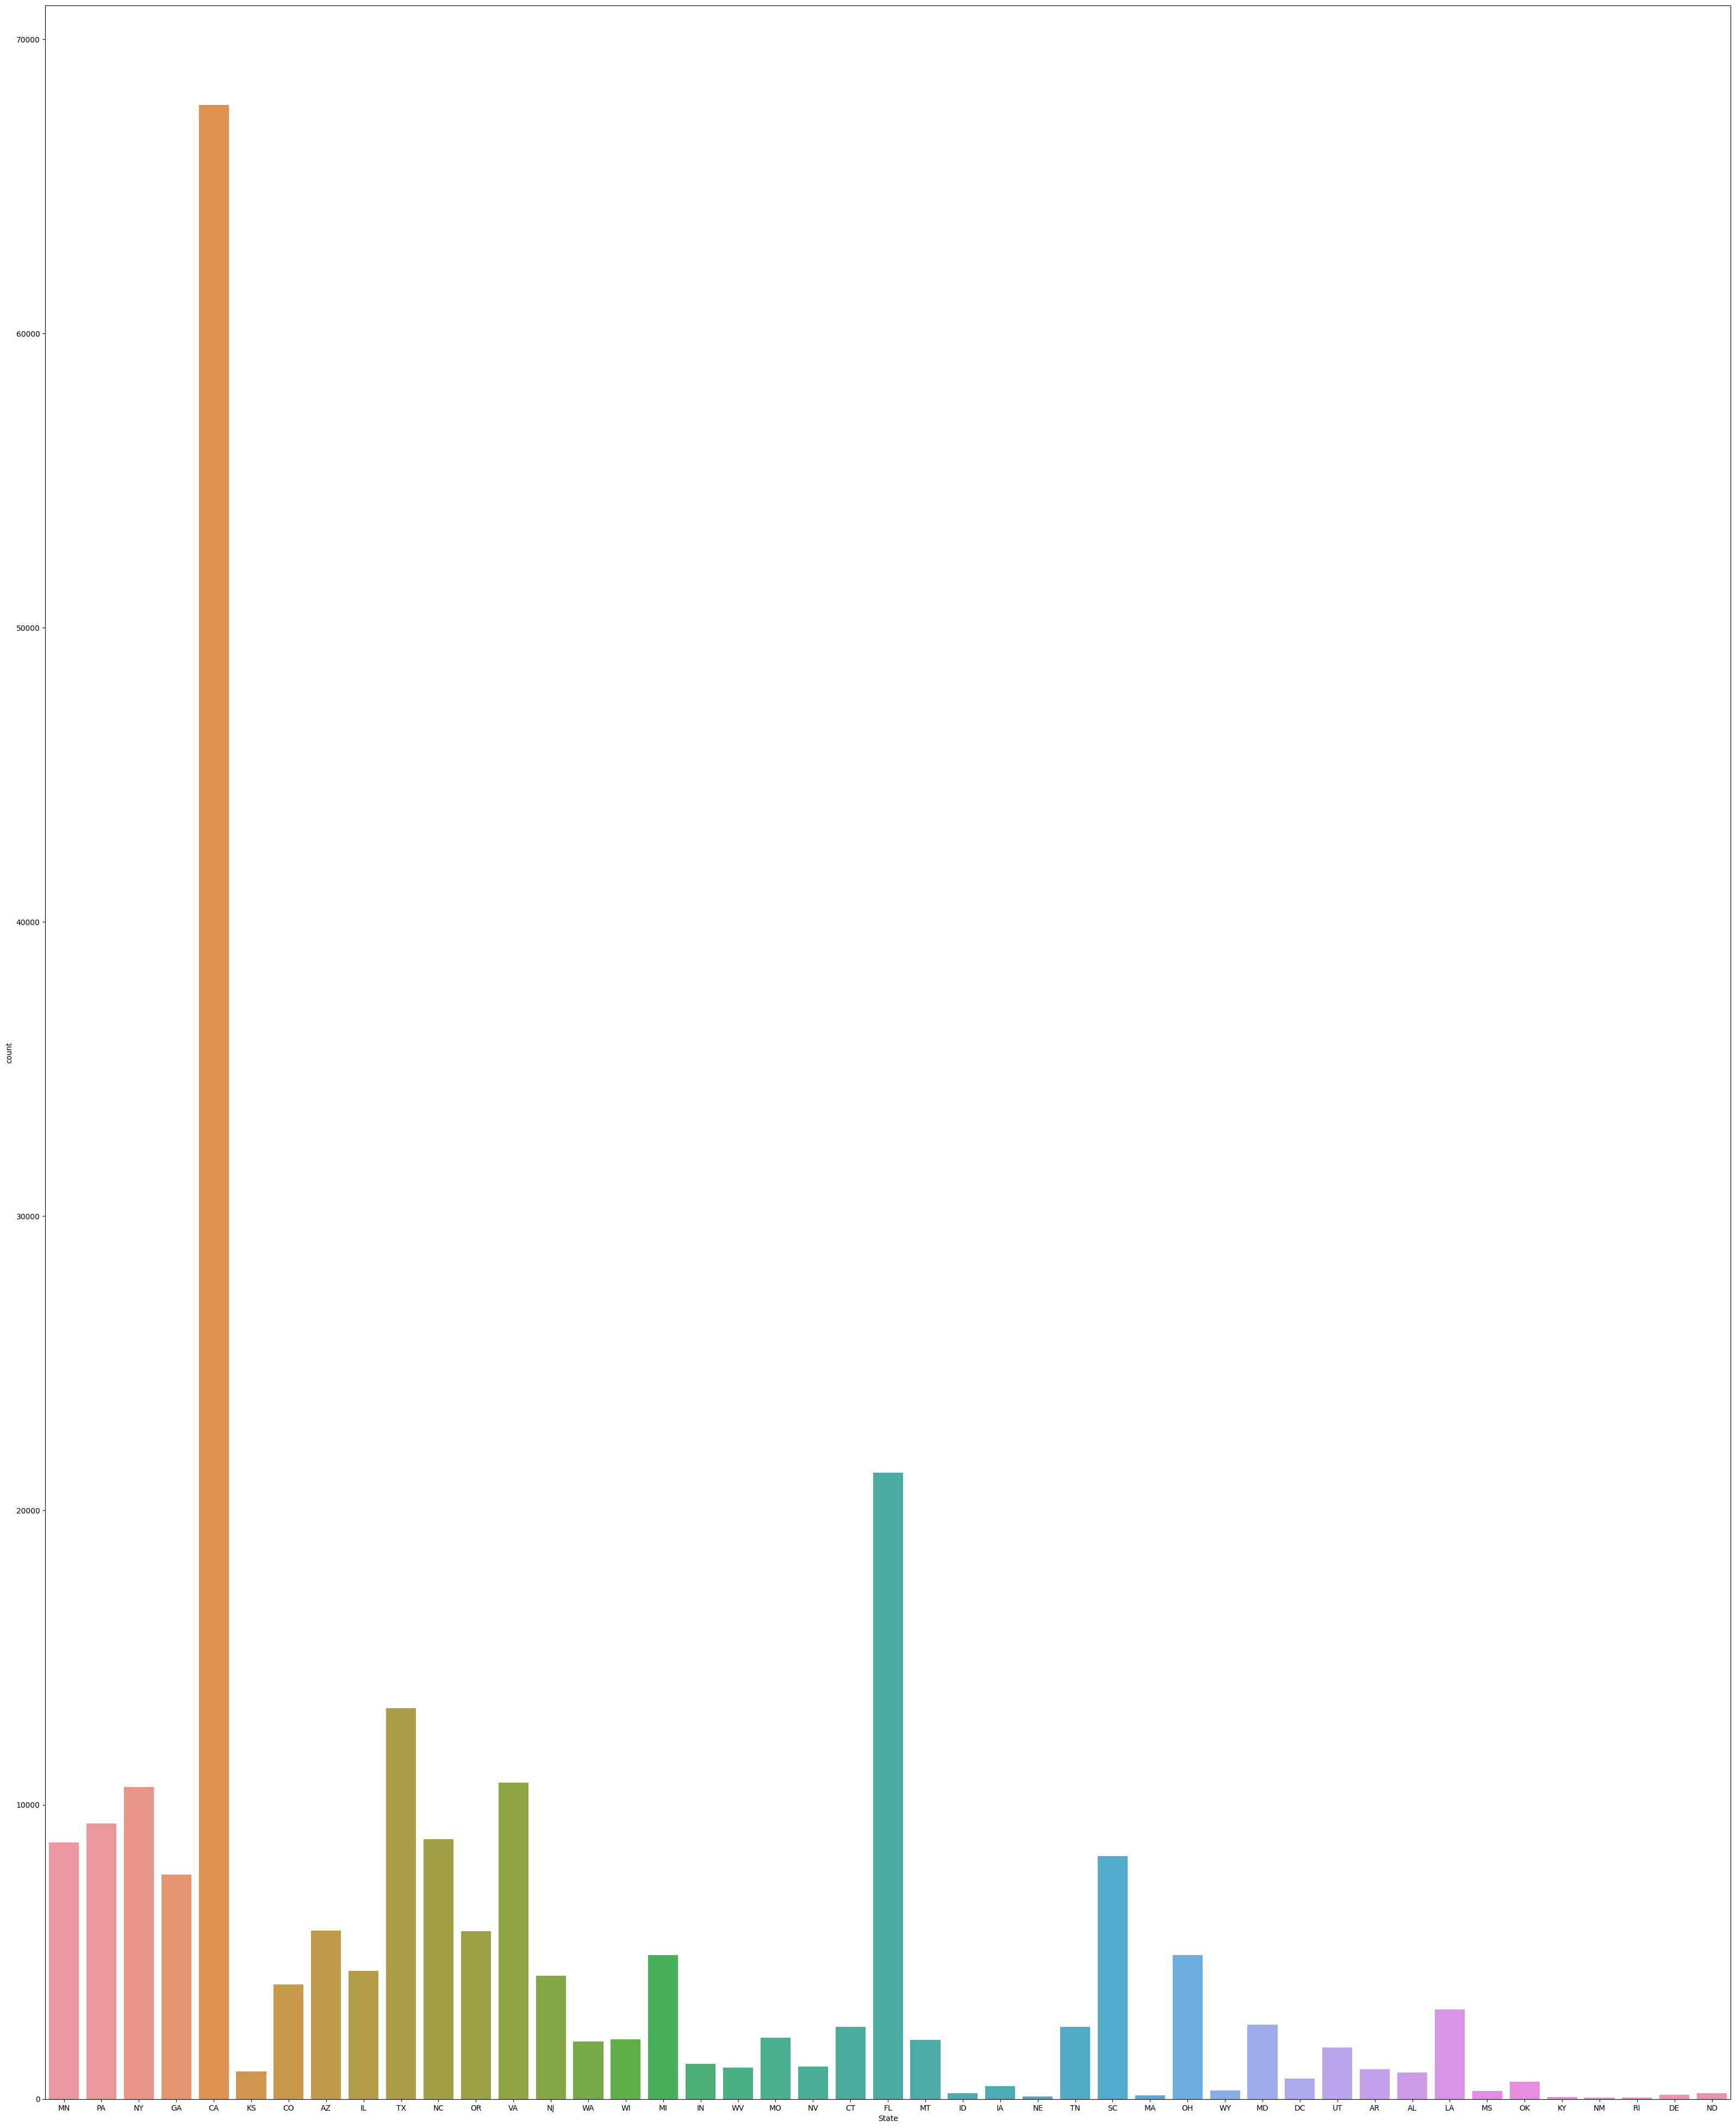

In [23]:
fig, ax = plt.subplots(figsize=(40, 50))

sns.countplot(x = 'State', data = df, ax=ax) #Countplot for the targeted output
plt.show()

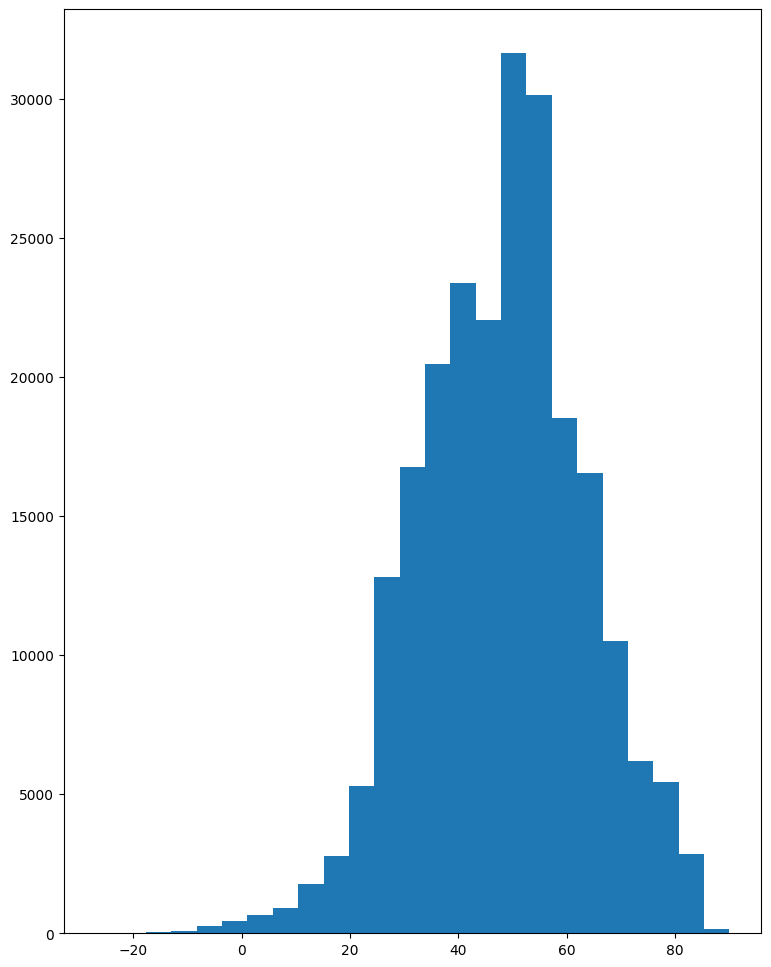

In [24]:
fig, ax = plt.subplots(figsize=(9, 12))

temperature = df['Temperature(F)']
plt.hist(temperature, bins=25)
plt.show()

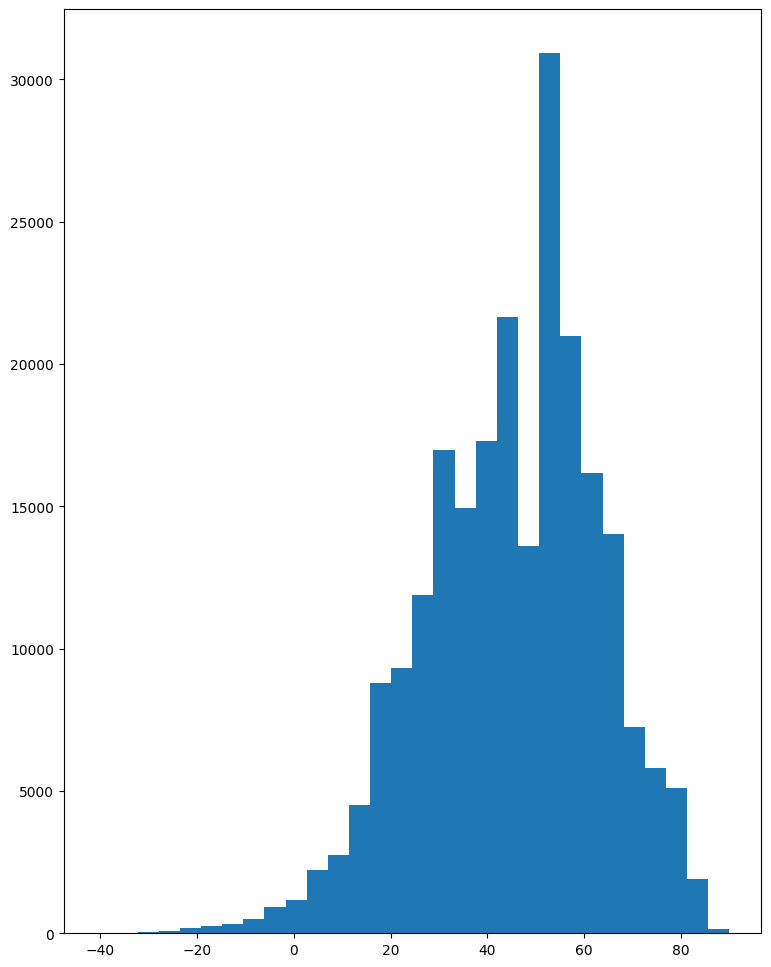

In [25]:
fig, ax = plt.subplots(figsize=(9, 12))

temperature = df['Wind_Chill(F)']
plt.hist(temperature, bins=30)
plt.show()

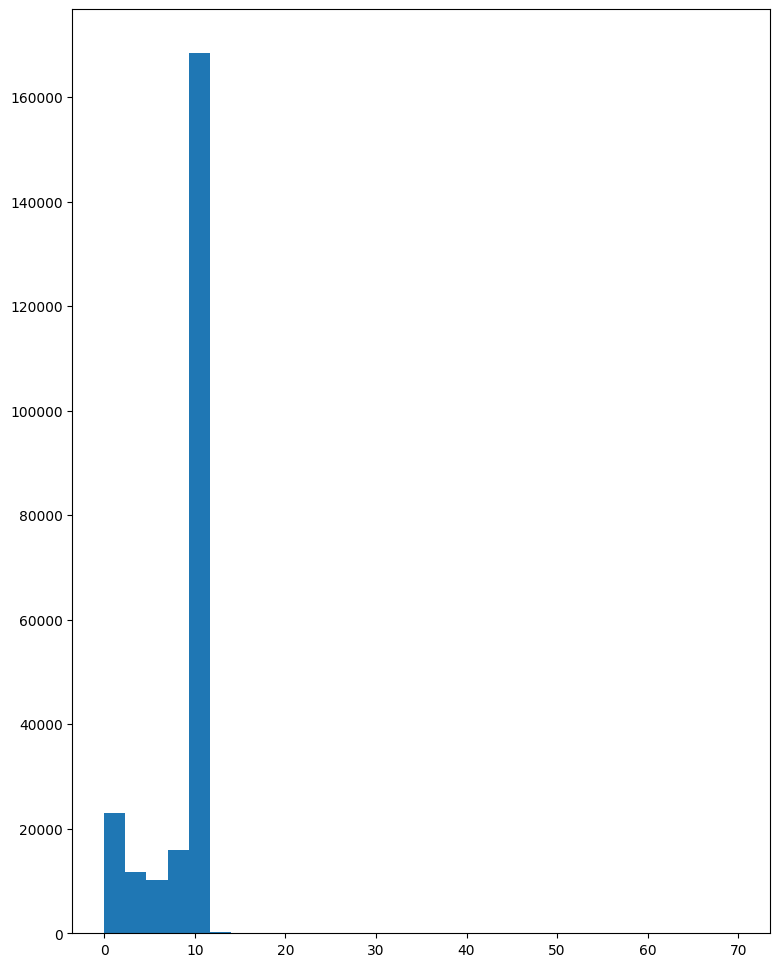

In [26]:
fig, ax = plt.subplots(figsize=(9, 12))

visibility = df['Visibility(mi)']
plt.hist(visibility, bins=30)
plt.show()

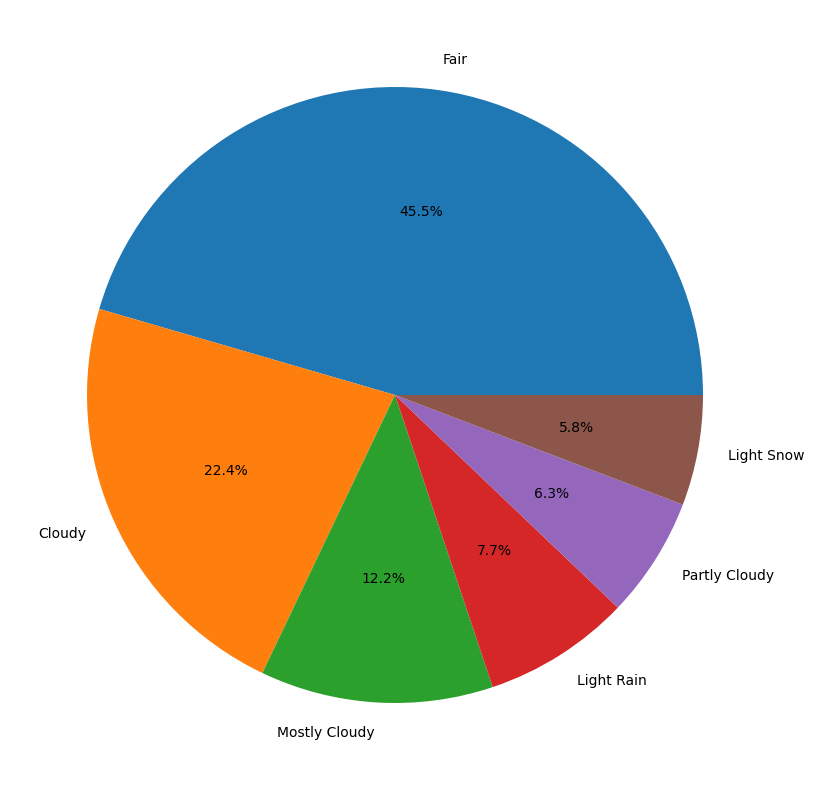

Weather_Condition
Fair                         92801
Cloudy                       45744
Mostly Cloudy                24934
Light Rain                   15785
Partly Cloudy                12912
                             ...  
Snow and Thunder                 1
Heavy Snow with Thunder          1
Heavy Sleet and Thunder          1
Heavy Sleet / Windy              1
Light Rain Shower / Windy        1
Length: 76, dtype: int64

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

weather_condition = df.value_counts('Weather_Condition').head(6)
labels = weather_condition.index
plt.pie(weather_condition, labels=labels, autopct='%1.1f%%')
plt.show()

df.value_counts('Weather_Condition') #Statistics of the required output

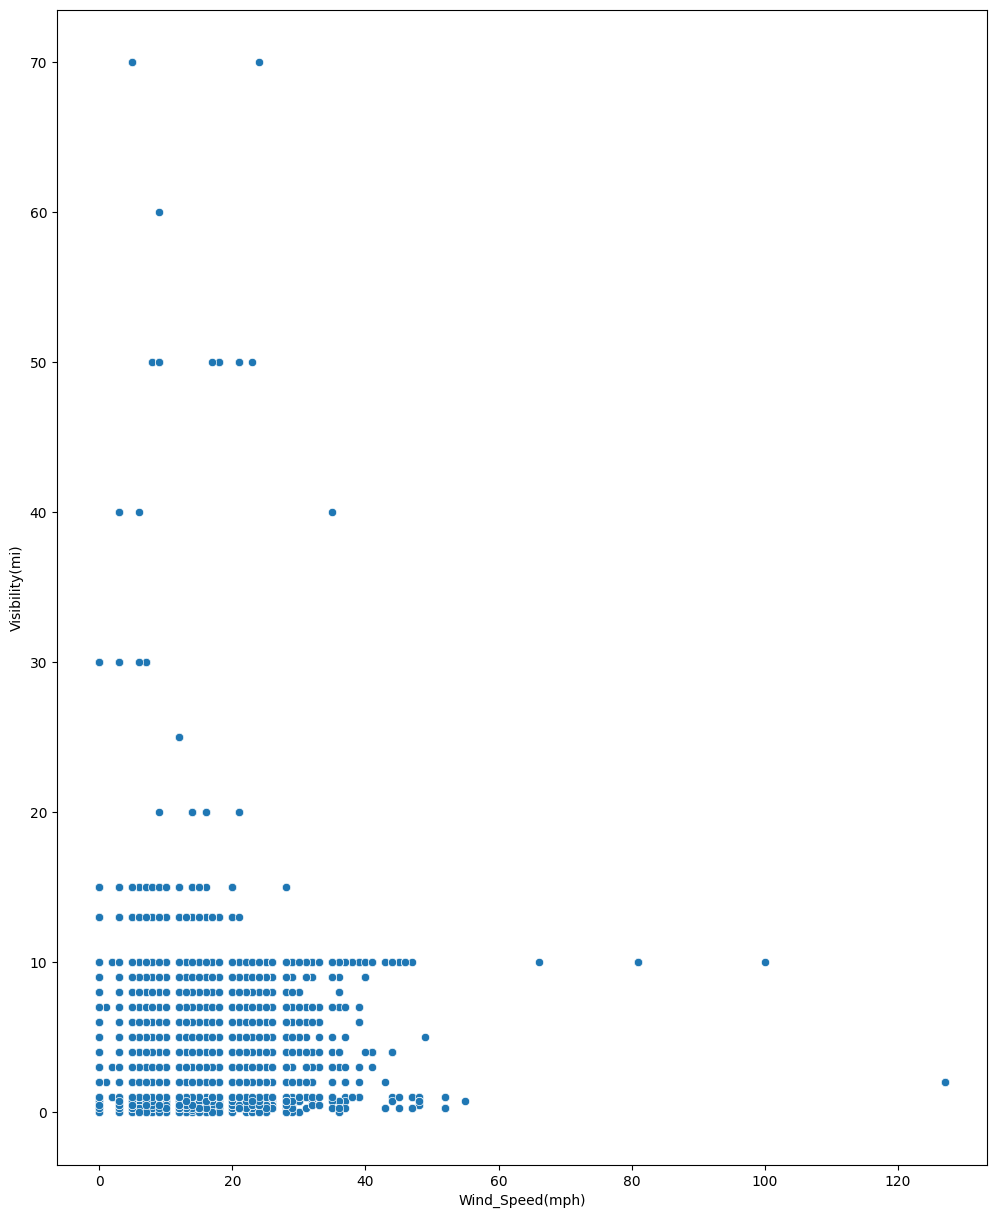

In [28]:
fig, ax = plt.subplots(figsize=(12, 15))

sns.scatterplot(x = 'Wind_Speed(mph)', y = 'Visibility(mi)', data = df, ax=ax) #Countplot for the targeted output
plt.show()

In [29]:
#Detecting outliers by obtaining the IQR of the distance 
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#How_to_Detect_Outliers?
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

q1 = df['Distance(mi)'].quantile(0.25)
q3 = df['Distance(mi)'].quantile(0.75)
iqr = q3 - q1
print(iqr)

0.857


In [30]:
#Finding and removing the outliers by detecting them using the upper and lower limits
#Upper Limit: (q3 + 1.5 * iqr)
#Lower Limit: (q1 - 1.5 * iqr)

#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#How_to_Detect_Outliers?

df[df['Distance(mi)'] > (q3 + 1.5 * iqr)]
df[df['Distance(mi)'] < (q1 - 1.5 * iqr)]

df = df[df['Distance(mi)'] < (q3 + 1.5 * iqr)] #Removing outliers
df.shape

(209203, 29)

Pre-Processing

In [31]:
ohencoder = OneHotEncoder(drop = 'first', dtype=np.int64)
dfn = df[['State', 'Wind_Direction', 'Sunrise_Sunset', 
          'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]  
dfn = ohencoder.fit_transform(dfn).toarray() 
dfn = pd.DataFrame(dfn)

In [32]:
dfn.info()
dfn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209203 entries, 0 to 209202
Data columns (total 65 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       209203 non-null  int64
 1   1       209203 non-null  int64
 2   2       209203 non-null  int64
 3   3       209203 non-null  int64
 4   4       209203 non-null  int64
 5   5       209203 non-null  int64
 6   6       209203 non-null  int64
 7   7       209203 non-null  int64
 8   8       209203 non-null  int64
 9   9       209203 non-null  int64
 10  10      209203 non-null  int64
 11  11      209203 non-null  int64
 12  12      209203 non-null  int64
 13  13      209203 non-null  int64
 14  14      209203 non-null  int64
 15  15      209203 non-null  int64
 16  16      209203 non-null  int64
 17  17      209203 non-null  int64
 18  18      209203 non-null  int64
 19  19      209203 non-null  int64
 20  20      209203 non-null  int64
 21  21      209203 non-null  int64
 22  22      209203 non-n

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [33]:
df = pd.concat([df, dfn], axis = 1)
df.drop(['State', 'Wind_Direction', 
         'Amenity', 'Bump', 'Crossing', 'Give_Way',
         'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
         'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
         'Sunrise_Sunset', 'Civil_Twilight',
         'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace = True)

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227930 entries, 0 to 229793
Data columns (total 75 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           209203 non-null  float64
 1   Distance(mi)       209203 non-null  float64
 2   Temperature(F)     209203 non-null  float64
 3   Wind_Chill(F)      209203 non-null  float64
 4   Humidity(%)        209203 non-null  float64
 5   Pressure(in)       209203 non-null  float64
 6   Visibility(mi)     209203 non-null  float64
 7   Wind_Speed(mph)    209203 non-null  float64
 8   Precipitation(in)  209203 non-null  float64
 9   Weather_Condition  209203 non-null  object 
 10  0                  209203 non-null  float64
 11  1                  209203 non-null  float64
 12  2                  209203 non-null  float64
 13  3                  209203 non-null  float64
 14  4                  209203 non-null  float64
 15  5                  209203 non-null  float64
 16  6 

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,...,55,56,57,58,59,60,61,62,63,64
0,2.0,0.661,33.0,22.0,89.0,28.33,3.0,17.0,0.05,Thunder / Wintry Mix,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.983,32.0,25.0,82.0,28.64,1.0,8.0,0.03,Light Snow,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2.0,0.692,31.0,22.0,79.0,29.86,6.0,10.0,0.00,Haze,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,1.922,61.0,61.0,22.0,29.19,10.0,10.0,0.00,Partly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [35]:
wea_con = ['Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain', 'Light Snow']

df.drop(df[~df['Weather_Condition'].isin(wea_con)].index, inplace=True)
        
df.dropna(axis = 0, how = 'any')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [36]:

df['Weather_Condition'] = df['Weather_Condition'].replace({'Mostly Cloudy': 'Cloudy', 'Partly Cloudy': 'Cloudy'})

In [37]:
df.value_counts('Weather_Condition')

Weather_Condition
Fair          76408
Cloudy        70022
Light Rain    13459
Light Snow     9381
dtype: int64

In [38]:
df['Weather_Condition'].replace(['Fair', 'Cloudy', 'Light Rain', 'Light Snow'], [1, 2, 3, 4], inplace=True)

In [39]:
df.value_counts('Weather_Condition')

Weather_Condition
1    76408
2    70022
3    13459
4     9381
dtype: int64

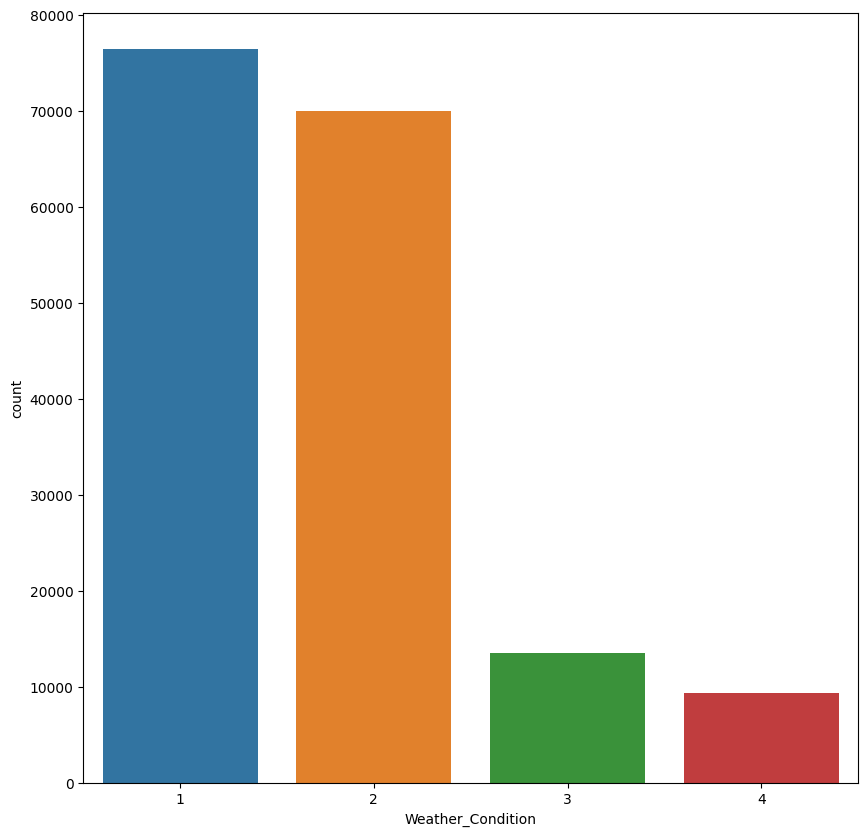

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(x = 'Weather_Condition', data = df, ax=ax) #Countplot for the targeted output
plt.show()

In [41]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169270 entries, 0 to 169269
Data columns (total 75 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           169270 non-null  float64
 1   Distance(mi)       169270 non-null  float64
 2   Temperature(F)     169270 non-null  float64
 3   Wind_Chill(F)      169270 non-null  float64
 4   Humidity(%)        169270 non-null  float64
 5   Pressure(in)       169270 non-null  float64
 6   Visibility(mi)     169270 non-null  float64
 7   Wind_Speed(mph)    169270 non-null  float64
 8   Precipitation(in)  169270 non-null  float64
 9   Weather_Condition  169270 non-null  int64  
 10  0                  169270 non-null  float64
 11  1                  169270 non-null  float64
 12  2                  169270 non-null  float64
 13  3                  169270 non-null  float64
 14  4                  169270 non-null  float64
 15  5                  169270 non-null  float64
 16  6 

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,...,55,56,57,58,59,60,61,62,63,64
0,2.0,0.983,32.0,25.0,82.0,28.64,1.0,8.0,0.03,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,2.0,1.922,61.0,61.0,22.0,29.19,10.0,10.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.028,54.0,54.0,75.0,29.89,10.0,3.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2.0,1.219,24.0,16.0,94.0,24.28,4.0,7.0,0.01,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.748,58.0,58.0,37.0,28.58,10.0,5.0,0.00,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df.duplicated().sum()

67

In [43]:
df.drop_duplicates()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,...,55,56,57,58,59,60,61,62,63,64
0,2.0,0.983,32.0,25.0,82.0,28.64,1.0,8.0,0.03,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,2.0,1.922,61.0,61.0,22.0,29.19,10.0,10.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.028,54.0,54.0,75.0,29.89,10.0,3.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2.0,1.219,24.0,16.0,94.0,24.28,4.0,7.0,0.01,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.748,58.0,58.0,37.0,28.58,10.0,5.0,0.00,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169265,2.0,0.706,26.0,14.0,92.0,29.15,3.0,16.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
169266,2.0,0.135,70.0,70.0,51.0,30.23,10.0,12.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
169267,4.0,0.940,36.0,36.0,97.0,29.41,5.0,0.0,0.02,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169268,4.0,0.028,47.0,44.0,42.0,28.75,10.0,7.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
df.dropna(axis = 0, how = 'any')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [45]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169270 entries, 0 to 169269
Data columns (total 75 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           169270 non-null  float64
 1   Distance(mi)       169270 non-null  float64
 2   Temperature(F)     169270 non-null  float64
 3   Wind_Chill(F)      169270 non-null  float64
 4   Humidity(%)        169270 non-null  float64
 5   Pressure(in)       169270 non-null  float64
 6   Visibility(mi)     169270 non-null  float64
 7   Wind_Speed(mph)    169270 non-null  float64
 8   Precipitation(in)  169270 non-null  float64
 9   Weather_Condition  169270 non-null  int64  
 10  0                  169270 non-null  float64
 11  1                  169270 non-null  float64
 12  2                  169270 non-null  float64
 13  3                  169270 non-null  float64
 14  4                  169270 non-null  float64
 15  5                  169270 non-null  float64
 16  6 

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,...,55,56,57,58,59,60,61,62,63,64
0,2.0,0.983,32.0,25.0,82.0,28.64,1.0,8.0,0.03,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,2.0,1.922,61.0,61.0,22.0,29.19,10.0,10.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.028,54.0,54.0,75.0,29.89,10.0,3.0,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2.0,1.219,24.0,16.0,94.0,24.28,4.0,7.0,0.01,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.748,58.0,58.0,37.0,28.58,10.0,5.0,0.00,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature Scaling

In [46]:
x = df.drop('Weather_Condition', axis = 1)
y = df[['Weather_Condition']]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [49]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

Predictive Analytics (Modelling with Machine Learning Models)

In [50]:
#Predicting with KNN (K-Nearest Neighbours) 
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

c:\Python392\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5658415549122703

In [51]:
#Predicting with Random Forest
#https://www.datacamp.com/tutorial/random-forests-classifier-python

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

C:\Users\shrik\AppData\Local\Temp\ipykernel_2548\2178794885.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


0.7507236958705027

In [52]:
#Predicting with Decision Trees
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.7438707390559461

Evaluation

In [53]:
#Initialising y_pred for KNN to acquire prediction scores

y_pred = knn.predict(x_test)
print(x_test)
print(y_pred)

[[-0.17358567 -0.7415801  -0.82863452 ... -0.73329211 -0.63913999
  -0.56633229]
 [-0.17358567 -0.85600551  0.89029361 ... -0.73329211 -0.63913999
  -0.56633229]
 [-0.17358567  1.09324141  0.36139265 ...  1.36371303  1.56460246
   1.7657478 ]
 ...
 [-0.17358567 -0.70143084 -0.36584618 ... -0.73329211 -0.63913999
  -0.56633229]
 [-0.17358567 -0.75362488  0.89029361 ... -0.73329211 -0.63913999
  -0.56633229]
 [-0.17358567  0.1075769   0.89029361 ... -0.73329211 -0.63913999
  -0.56633229]]
[2 1 1 ... 2 2 3]


In [54]:
#Classification Report for KNN
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.65      0.62     15283
           2       0.52      0.51      0.52     14084
           3       0.63      0.35      0.45      2639
           4       0.75      0.57      0.65      1848

    accuracy                           0.57     33854
   macro avg       0.62      0.52      0.56     33854
weighted avg       0.57      0.57      0.56     33854



[[9935 5242   73   33]
 [6241 7247  387  209]
 [ 530 1075  915  119]
 [ 220  488   81 1059]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

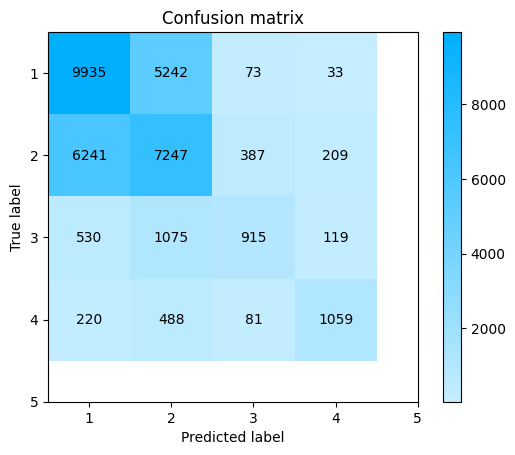

In [55]:
#Confusion Matrix for KNN
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

print(confusion_matrix(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])

In [57]:
#Mean Squared Error for KNN

print(mean_squared_error(y_test, y_pred))

0.609145152714598


In [58]:
#Initialising y_pred for Random Forest to acquire prediction scores
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

y_pred = rf.predict(x_test)
print(x_test)
print(y_pred)

[[-0.17 -0.74 -0.83 ... -0.73 -0.64 -0.57]
 [-0.17 -0.86  0.89 ... -0.73 -0.64 -0.57]
 [-0.17  1.09  0.36 ...  1.36  1.56  1.77]
 ...
 [-0.17 -0.7  -0.37 ... -0.73 -0.64 -0.57]
 [-0.17 -0.75  0.89 ... -0.73 -0.64 -0.57]
 [-0.17  0.11  0.89 ... -0.73 -0.64 -0.57]]
[1 2 2 ... 1 1 3]


In [59]:
#Classification Report for Random Forest
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.80      0.78     15283
           2       0.71      0.70      0.71     14084
           3       0.84      0.67      0.74      2639
           4       0.89      0.88      0.89      1848

    accuracy                           0.75     33854
   macro avg       0.80      0.76      0.78     33854
weighted avg       0.75      0.75      0.75     33854



[[12187  3059    21    16]
 [ 3787  9838   305   154]
 [  116   736  1755    32]
 [   14   179    20  1635]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

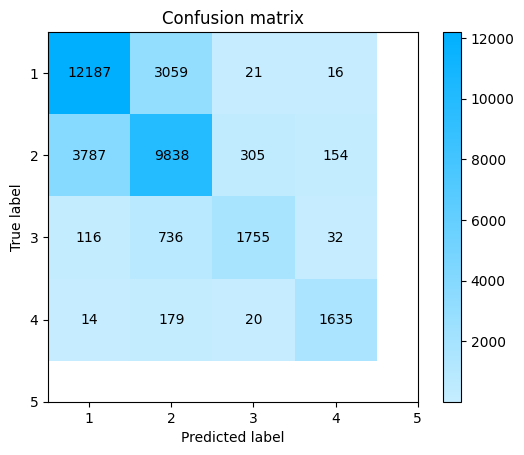

In [60]:
#Confusion Matrix for Random Forest
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

print(confusion_matrix(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])

In [61]:
#Mean Squared Error for Random Forest

print(mean_squared_error(y_test, y_pred))

0.29801500561233535


In [62]:
#Initialising y_pred for Decision Trees to acquire prediction scores
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

y_pred = dt.predict(x_test)
print(x_test)
print(y_pred)

[[-0.17 -0.74 -0.83 ... -0.73 -0.64 -0.57]
 [-0.17 -0.86  0.89 ... -0.73 -0.64 -0.57]
 [-0.17  1.09  0.36 ...  1.36  1.56  1.77]
 ...
 [-0.17 -0.7  -0.37 ... -0.73 -0.64 -0.57]
 [-0.17 -0.75  0.89 ... -0.73 -0.64 -0.57]
 [-0.17  0.11  0.89 ... -0.73 -0.64 -0.57]]
[2 1 2 ... 1 2 3]


In [63]:
#Classification Report for Decision Trees
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.76      0.77     15283
           2       0.70      0.72      0.71     14084
           3       0.71      0.73      0.72      2639
           4       0.85      0.86      0.85      1848

    accuracy                           0.74     33854
   macro avg       0.76      0.77      0.76     33854
weighted avg       0.74      0.74      0.74     33854



[[11594  3479   168    42]
 [ 3195 10078   612   199]
 [  122   553  1930    34]
 [   26   223    18  1581]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

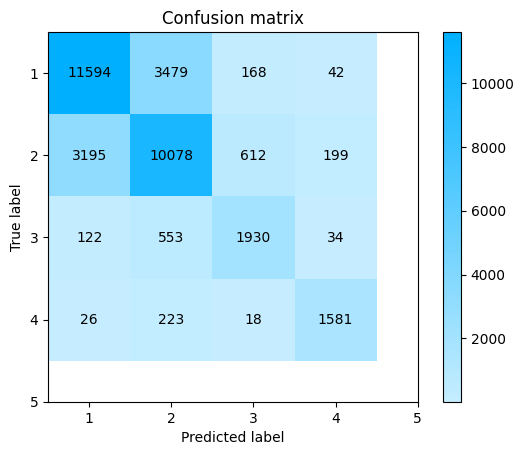

In [64]:
#Confusion Matrix for Decision Trees
#https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

print(confusion_matrix(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred, target_names=['1', '2', '3', '4', '5'])

In [65]:
#Mean Squared Error for Decision Trees

print(mean_squared_error(y_test, y_pred))

0.33529272759496664


In [66]:
#Splitting into training and testing scores (KNN)

score = knn.score(x_train, y_train) 
print('Training score: {:.3f}'.format(score))

score = knn.score(x_test, y_test) 
print('Test score: {:.3f}'.format(score))

Training score: 0.768
Test score: 0.566


In [67]:
#Splitting into training and testing scores (Random Forest)

score = rf.score(x_train, y_train) 
print('Training score: {:.3f}'.format(score))

score = rf.score(x_test, y_test) 
print('Test score: {:.3f}'.format(score))

Training score: 1.000
Test score: 0.751


In [68]:
#Splitting into training and testing scores (Decision Trees)

score = dt.score(x_train, y_train) 
print('Training score: {:.3f}'.format(score))

score = dt.score(x_test, y_test)
print('Test score: {:.3f}'.format(score))

Training score: 1.000
Test score: 0.744
